In [20]:
# Lab settings - please ingnore
options(repr.plot.width=7, repr.plot.height=3.5) # Make plots a resonable size

<div class="big_title">LAB 6: SQL databases and R</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure the required files are in the working directory:

* Create a **folder**  on the "desktop" and name it `Lab6`
* Create a **sub-folder** called `data_raw` inside your `lab6` folder. Ideally, you would keep your raw and cleaned data separete in case you ever needed your raw data again.
* From Brightspace, download the `portal_mammals.sqlite` file into your `Desktop/Lab6/data_raw` folder:
* In RStudio, change the working directory to `Desktop/Lab6`
* In RStudio, create a new R script, name it `lab6.r` and make sure you save it in `Desktop\Lab6`. You will be writting and copy-pasting code to your `lab6.r` file so that you can keep a record of all you did in this lab.


As in previous labs, we'll try simulate "real-life" coding, where:

1. sometimes you want to type of copy-paste directly in `lab6.r` file, using RSTudio's <span class="editor"></span>, to build a script file that can be run as a whole to accomplish a series of tasks. Here you can execute sections as you type them in, by highlighting and clicking <span class="run"></span>. We'll guide you when to use the <span class="editor"></span> with the following:

<span class="editor"></span> <br>

1. some other times you want to quickly type or copy-paste code into RStudio's <span class="console"></span> and click [enter] as a way to do "one-off" queries or inspections that you do not want to be part of your script file. We'll guide you when to use the <span class="console"></span> with the following:

<span class="runcell"></span>

# What are databases

A database is an organized collection of structured information, or data, typically stored electronically in a computer system. A database is usually controlled by a database management system (DBMS). Together, the data and the DBMS, along with the applications that are associated with them, are referred to as a database system, often shortened to just database.

Data within the most common types of databases in operation today is typically modeled in rows and columns in a series of tables to make processing and data querying efficient. The data can then be easily accessed, managed, modified, updated, controlled, and organized. Most databases use structured query language (SQL) for writing and querying data.

# What to do about very large datasets?

So far, we have dealt with small datasets that easily fit into your computer's memory. But what about datasets that are too large for your computer to handle as a whole? In this case, storing the data outside of R and organizing it in a database is helpful. Connecting to the database allows you to retrieve only the chunks needed for the current analysis.

Even better, many large datasets are already available in public or private databases. You can query them without having to download the data first.

R can connect to almost any existing database type. Most common database types have R packages that allow you to connect to them (e.g., RSQLite, RMySQL, etc). Furthermore, the dplyr package, in conjunction with dbplyr, supports connecting to the widely-used open source databases sqlite, mysql and postgresql, as well as Google’s bigquery, and it can also be extended to other database types. 

The dplyr package now has a generalized SQL backend for talking to databases, and the new dbplyr package translates R code into database-specific variants. As of this writing, SQL variants are supported for the following databases: Oracle, Microsoft SQL Server, PostgreSQL, Amazon Redshift, Apache Hive, and Apache Impala. Interfacing with databases using dplyr focuses on retrieving and analyzing datasets by generating SELECT SQL statements, but it doesn't modify the database itself. dplyr does not offer functions to UPDATE or DELETE entries. If you need these functionalities, you will need to use additional R packages (e.g., RSQLite). 

# What is Structured Query Language (SQL)?

SQL is a programming language used by nearly all relational databases to query, manipulate, and define data, and to provide access control. SQL was first developed at IBM in the 1970s with Oracle as a major contributor, which led to implementation of the SQL ANSI standard, SQL has spurred many extensions from companies such as IBM, Oracle, and Microsoft. Although SQL is still widely used today, new programming languages are beginning to appear.

SQLite is the most widely deployed database in the world. It is included on Android, iPhone and IOS devices and in Firefox, Chrome and Safari web browsers. Apple and Microsoft include it in their OSX and Windows 10 operating systems respectively and there are many other products that include SQLite. It is extremely easy to use, and can be of great value to developers who need a database available but want to avoid the overhead often associated with installing and configuring an external database. In this demonstration, we will download and install the RSQLite package which will integrate SQLite into R running in RStudio. 

Here we will demonstrate how to interact with a database using dplyr, using both the dplyr's verb syntax and the SQL syntax.

# Connect the databases

We can point R to this database using the `dplyr`, `dbplyr` and `RSQLite` packages. We will create a new, empty SQLite database where we can store the `mammals` data. SQLite has a rather simple data storage mechanism, all data for a database is installed within a single file.  The name of this file must be specified when the database is created, and a connection to this database is returned and used in subsequent commands to access and manipulate the data and data structures within the database. 

<span class="runcell"></span>

In [ ]:
install.packages(c("dbplyr", "RSQLite"))

In [21]:
library(dplyr)
library(dbplyr)
library(ggplot2)

mammals <- DBI::dbConnect(RSQLite::SQLite(), "data_raw/portal_mammals.sqlite")

This command uses 2 packages that helps dbplyr and dplyr talk to the SQLite database. `DBI` is not something that you'll use directly as a user. It allows R to send commands to databases irrespective of the database management system used. The RSQLite package allows R to interface with SQLite databases.

This command does not load the data into the R session (as the read_csv() function did). Instead, it merely instructs R to connect to the SQLite database contained in the `portal_mammals.sqlite` file.

Using a similar approach, you could connect to many other database management systems that are supported by R including MySQL, PostgreSQL, BigQuery, etc.

Let's take a closer look at the mammals database we just connected to.

<span class="runcell"></span> <br>

<div class="Q"><br><br>

What type of file is `portal_mammals`? 

ANSWER: sqlite

<br><br><div class="qhelp"></div></div>

In [22]:
src_dbi(mammals)

src:  sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
tbls: plots, species, surveys

Just like a spreadsheet with multiple worksheets, a SQLite database can contain multiple tables. In this case three of them are listed in the tbls row in the output above:

* plots
* species
* surveys

Now that we know we can connect to the database, let's explore how to get the data from its tables into R.

<div class="Q"><br><br>

what does the 'src:' from the `src_dbi` function tell you? 

ANSWER: File source (i.e. which file you're reading)

<br><br><div class="qhelp"></div></div>

## Querying with SQL syntax

To connect to tables within a database, you can use the `tbl()` function from dplyr. This function can be used to send SQL queries to the database. To demonstrate this functionality, let's select the columns "year", "species_id", and "plot_id" from the surveys table.

<span class="runcell"></span> <br>

In [23]:
tbl(mammals, sql("SELECT year, species_id, plot_id FROM surveys"))

# Source:   SQL [?? x 3]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
    year species_id plot_id
   <int> <chr>        <int>
 1  1977 NL               2
 2  1977 NL               3
 3  1977 DM               2
 4  1977 DM               7
 5  1977 DM               3
 6  1977 PF               1
 7  1977 PE               2
 8  1977 DM               1
 9  1977 DM               1
10  1977 PF               6
# ... with more rows

<div class="Q"><br>

What class of object does `tbl()` return? 

ANSWER: table
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How many columns does the previous table have? 

ANSWER: 3
<br><br><div class="qhelp"></div></div>

## Querying with dplry syntax

We can do something similar using the dplyr package. First, we select the table on which to do the operations by creating the surveys object, and then we use the standard dplyr syntax as if it were a data frame.

<span class="runcell"></span> <br>

In [75]:
surveys <- tbl(mammals, "surveys")

surveys %>%
    select(year, species_id, plot_id)

# Source:   lazy query [?? x 3]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
    year species_id plot_id
   <int> <chr>        <int>
 1  1977 NL               2
 2  1977 NL               3
 3  1977 DM               2
 4  1977 DM               7
 5  1977 DM               3
 6  1977 PF               1
 7  1977 PE               2
 8  1977 DM               1
 9  1977 DM               1
10  1977 PF               6
# ... with more rows

The `surveys` object behaves like a data frame. Several functions that can be used with data frames can also be used on tables from a database. The ouput looks just like a regular data frame. However, the columns plot_type, taxa, genus, and species are missing. These are now located in the tables `plots` and `species` which we will join together in a moment.

<span class="note"></span>Some dplyr functions won't work the way we expect them too. For example, let's check to see how many rows `surveys` has with the `n_row()` function.

<span class="runcell"></span> <br>

In [78]:
nrow(surveys)

[1] NA

`n_row()` returns NA. You may have also noticed that the `surveys` output included "??" indicating the number of rows was unknown. The reason for this behavior highlights a key difference between using dplyr on datasets in memory (e.g. loaded into your R session via `read_csv()`) and those provided by a database. 

To understand it, we take a closer look at how dplyr communicates with our SQLite database.

<div class="Q"><br>

What class of object is `surveys`? 

ANSWER: Table
<br><br><div class="qhelp"></div></div>


# SQL translation

Relational databases typically use a special-purpose language, Structured Query Language (SQL), to manage and query data.

For example, the following SQL query returns the first 10 rows from the surveys table.

In [26]:
SELECT *
FROM `surveys`
LIMIT 10

ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected symbol
1: SELECT *
2: FROM `surveys`
        ^


We can use dplyr's `show_query()` function to show which SQL commands are actually sent to the database.

<span class="runcell"></span> <br>

In [79]:
show_query(head(surveys, n = 10))

<SQL>
SELECT *
FROM `surveys`
LIMIT 10


The output shows the actual SQL query sent to the database; it matches our manually constructed SELECT statement above.

<img src="sql vs r.png" width="700px">

<div class="Q"><br>

What does `show_query` do? 

ANSWER: shows which SQL commands are sent to the database
<br><br><div class="qhelp"></div></div>

Behind the scenes, dplyr:

1. translates your R code into SQL
1. submits it to the database
1. translates the database's response into an R data frame

Instead of having to formulate the SQL query ourselves - and having to mentally switch back and forth between R and SQL syntax - we can delegate this translation to dplyr. dplyr, in turn, doesn't do the real work of subsetting the table, either. Instead, it merely sends the query to the database, waits for its response and returns it to us.

R connects to the database and downloads a bare minimum of information on fields, data types, etc. — enough to allow manipulation of the object without physical download of the data. R never gets to see the full surveys table - and that's why it could not tell us how many rows it contains.

There are two components to dplyr’s SQL translation system:

* translation of vector expressions like x * y + 10

* translation of whole verbs like mutate() or summarise()

Most filtering, mutating, or summarising operations only perform simple mathematical operations. These operations are very similar between R and SQL, so they’re easy to translate. To see what’s happening yourself, you can use `translate_sql()`. `translate_sql()` is built on top of R’s parsing engine and has been carefully designed to generate correct SQL. It also protects you against SQL injection attacks by correctly escaping the strings and variable names needed by the database that you’re connecting to.

Let's take a look at some differences between R ans SQL

* " and ' aren't the same

In [80]:
# In SQLite, variable names are escaped by double quotes

translate_sql(x)
#> <SQL> `x`

# And strings are escaped by single quotes

translate_sql("x")
#> <SQL> 'x'

<SQL> `x`

<SQL> 'x'

* functions have different names

In [55]:
translate_sql(x == 1 && (y < 2 || z > 3))
#> <SQL> `x` = 1.0 AND (`y` < 2.0 OR `z` > 3.0)

translate_sql(x ^ 2 < 10)
#> <SQL> POWER(`x`, 2.0) < 10.0

translate_sql(x %% 2 == 10)
#> <SQL> `x` % 2.0 = 10.0

<SQL> `x` = 1.0 AND (`y` < 2.0 OR `z` > 3.0)

<SQL> POWER(`x`, 2.0) < 10.0

<SQL> `x` % 2.0 = 10.0

* functions have different arguement orders

In [56]:
translate_sql(substr(x, 5, 10))
#> <SQL> SUBSTR(`x`, 5, 6)

translate_sql(log(x, 10))
#> <SQL> LOG(10.0, `x`)

<SQL> SUBSTR(`x`, 5, 6)

<SQL> LOG(10.0, `x`)

* R and SQL have different defaults for integers and reals. In R, 1 is a real, and 1L is an integer. In SQL, 1 is an integer, and 1.0 is a real number.

In [57]:
translate_sql(1)
#> <SQL> 1.0

translate_sql(1L)
#> <SQL> 1

<SQL> 1.0

<SQL> 1

* If statements are translated into a case statement

In [58]:
translate_sql(if (x > 5) "big" else "small")
#> <SQL> CASE WHEN (`x` > 5.0) THEN ('big') WHEN NOT(`x` > 5.0) THEN ('small') END

<SQL> CASE WHEN (`x` > 5.0) THEN ('big') WHEN NOT(`x` > 5.0) THEN ('small') END

dplyr can translate many different query types into SQL allowing us to `select()` specific columns, `filter(`) rows, or join tables. You can now manipulate `surveys` in the same way as you would manipulate other tables in R.

To see this in action, let's compose a few queries with dplyr.

<div class="Q"><br>

In SQL, is 3 and integer or real number? 

ANSWER: Integer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What does `translate_sql` do? 

ANSWER: generates correct SQL output
<br><br><div class="qhelp"></div></div>

## Simple database queries

First, let's only request rows of the surveys table in which weight is less than 5 and keep only the species_id, sex, and weight columns.

<span class="runcell"></span> <br>

In [59]:
simple<-surveys %>%
  filter(weight < 5) %>%
  select(species_id, sex, weight)

simple

# Source:   lazy query [?? x 3]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
   species_id sex   weight
   <chr>      <chr>  <int>
 1 PF         M          4
 2 PF         F          4
 3 PF         <NA>       4
 4 PF         F          4
 5 PF         F          4
 6 RM         M          4
 7 RM         F          4
 8 RM         M          4
 9 RM         M          4
10 RM         M          4
# ... with more rows

Executing this command will return a table showing 10 rows and the requested species_id, sex and weight columns.
But wait, what does the last line mean?

In [60]:
# ... with more rows

This indicates that R is only showing us the first 10 rows that fit our criterion. It does not call the whole dataset.

<span class="note"></span>It does not return a dataframe object! The `str()` call returns a list of tables instead.

<span class="runcell"></span> <br>

In [61]:
str(simple)

List of 2
 $ src:List of 2
  ..$ con  :Formal class 'SQLiteConnection' [package "RSQLite"] with 8 slots
  .. .. ..@ ptr                :<externalptr> 
  .. .. ..@ dbname             : chr "C:\\Users\\Diego\\Documents\\6.Biologist's Toolkit\\25Jan\\biol3782\\week6\\data_raw\\portal_mammals.sqlite"
  .. .. ..@ loadable.extensions: logi TRUE
  .. .. ..@ flags              : int 70
  .. .. ..@ vfs                : chr ""
  .. .. ..@ ref                :<environment: 0x00000000046d0728> 
  .. .. ..@ bigint             : chr "integer64"
  .. .. ..@ extended_types     : logi FALSE
  ..$ disco: NULL
  ..- attr(*, "class")= chr [1:4] "src_SQLiteConnection" "src_dbi" "src_sql" "src"
 $ ops:List of 4
  ..$ name: chr "select"
  ..$ x   :List of 4
  .. ..$ name: chr "filter"
  .. ..$ x   :List of 2
  .. .. ..$ x   : 'ident' chr "surveys"
  .. .. ..$ vars: chr [1:9] "record_id" "month" "day" "year" ...
  .. .. ..- attr(*, "class")= chr [1:3] "op_base_remote" "op_base" "op"
  .. ..$ dots:List of 1
  

When working with databases, dplyr tries to be as lazy as possible.

* It never pulls data into R unless you explicitly ask for it.
* It delays doing any work until the last possible moment - it collects together everything you want to do and then sends it to the database in one step.

<div class="Q"><br>

Why does the object `simple` only return 10 rows and not the whole dataset? 

ANSWER: dplyr never pulls all data into R unless you it to.
<br><br><div class="qhelp"></div></div>

When you construct a dplyr query, you can connect multiple verbs into a single pipeline. For example, we combined the `filter()` and `select()` verbs using the `%>%` pipe.

<span class="runcell"></span> <br>

In [62]:
data_subset <- surveys %>%
  filter(weight < 5) %>%
  select(species_id, sex, weight)

data_subset

# Source:   lazy query [?? x 3]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
   species_id sex   weight
   <chr>      <chr>  <int>
 1 PF         M          4
 2 PF         F          4
 3 PF         <NA>       4
 4 PF         F          4
 5 PF         F          4
 6 RM         M          4
 7 RM         F          4
 8 RM         M          4
 9 RM         M          4
10 RM         M          4
# ... with more rows

Now let's take a look at the structure of `data_subset`

<span class="runcell"></span> <br>

In [63]:
str(data_subset)

List of 2
 $ src:List of 2
  ..$ con  :Formal class 'SQLiteConnection' [package "RSQLite"] with 8 slots
  .. .. ..@ ptr                :<externalptr> 
  .. .. ..@ dbname             : chr "C:\\Users\\Diego\\Documents\\6.Biologist's Toolkit\\25Jan\\biol3782\\week6\\data_raw\\portal_mammals.sqlite"
  .. .. ..@ loadable.extensions: logi TRUE
  .. .. ..@ flags              : int 70
  .. .. ..@ vfs                : chr ""
  .. .. ..@ ref                :<environment: 0x00000000046d0728> 
  .. .. ..@ bigint             : chr "integer64"
  .. .. ..@ extended_types     : logi FALSE
  ..$ disco: NULL
  ..- attr(*, "class")= chr [1:4] "src_SQLiteConnection" "src_dbi" "src_sql" "src"
 $ ops:List of 4
  ..$ name: chr "select"
  ..$ x   :List of 4
  .. ..$ name: chr "filter"
  .. ..$ x   :List of 2
  .. .. ..$ x   : 'ident' chr "surveys"
  .. .. ..$ vars: chr [1:9] "record_id" "month" "day" "year" ...
  .. .. ..- attr(*, "class")= chr [1:3] "op_base_remote" "op_base" "op"
  .. ..$ dots:List of 1
  

Notice that the `str()` call returns a list instead of a dataframe. The call `select(species_id, sex, weight)` command wasn't executed by R but was sent to the database instead.R doesn't retrieve the full set of results - instead it only retrieves the first 10 results from the database by default. 

<div class="Q"><br>

Why does the object `data_subset` only return 10 rows? 

ANSWER: dplyr never pulls all data into R unless you it to and  it collects together everything you want to do and then sends it to the database in one step
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What class of object is `data_subset`? 

ANSWER: list.
<br><br><div class="qhelp"></div></div>

To instruct R to retrieve all of the query results from the database, we add the `collect()` command to our pipe. It indicates that our database query is finished, get the final results, then load them into the R session. 

<span class="runcell"></span> <br>

In [64]:
data_subset <- surveys %>%
  filter(weight > 5) %>%
  select(species_id, sex, weight) %>%
  collect()

data_subset %>% 
head()

species_id,sex,weight
DM,M,40
DM,M,48
DM,F,29
DM,F,46
DM,M,36
DO,F,52


Let's take a look at `data_subset` again.

<span class="runcell"></span> <br>

In [65]:
str(data_subset)

tibble [32,208 x 3] (S3: tbl_df/tbl/data.frame)
 $ species_id: chr [1:32208] "DM" "DM" "DM" "DM" ...
 $ sex       : chr [1:32208] "M" "M" "F" "F" ...
 $ weight    : int [1:32208] 40 48 29 46 36 52 8 22 35 7 ...


<span class="editor"></span> <br>

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

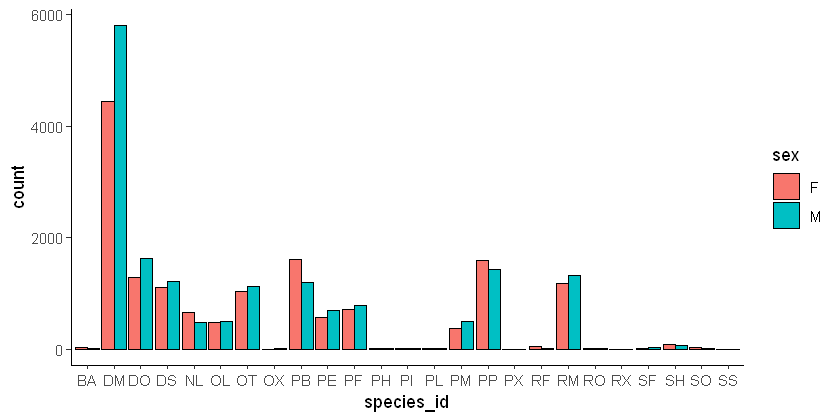

In [66]:
ggplot(data_subset %>% na.omit(), aes(species_id))+
geom_histogram(aes(fill=sex), position = "dodge",stat = "count", color="black") +
theme_classic()

Notice the `str()` call now returns the structure of a dataframe. Now we have all 32208 rows that match our query in a dataframe and can continue to work with them exclusively in R, without communicating with the database.

<div class="Q"><br>

How many observations does `data_subset` have? 

ANSWER: 32208
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What class of varaible is `sex`? 

ANSWER: character
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

TRUE or FALSE: `collect()` retrieves all queiries from our database? 

ANSWER: TRUE
<br><br><div class="qhelp"></div></div>

## Complex database queries

dplyr enables database queries across one or multiple database tables, using the same single- and multiple-table verbs you encountered previously. This means you can use the same commands regardless of whether you interact with a remote database or local dataset. 

This is a really useful feature if you work with large datasets: 

* you can first prototype your code on a small subset that fits into memory, and when your code is ready, 
* you can change the input dataset to your full database without having to change the syntax.

Being able to use SQL queries directly can be useful if your collaborators have already put together complex queries to prepare the dataset that you need for your analysis.

To illustrate how to use dplyr with these complex queries, we are going to join the plots and surveys tables. The plots table in the database contains information about the different plots surveyed by the researchers. To access it, we point the `tbl()` command to it.

<span class="editor"></span> <br>

In [67]:
plots <- tbl(mammals, "plots")
plots

# Source:   table<plots> [?? x 2]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
   plot_id plot_type                
     <int> <chr>                    
 1       1 Spectab exclosure        
 2       2 Control                  
 3       3 Long-term Krat Exclosure 
 4       4 Control                  
 5       5 Rodent Exclosure         
 6       6 Short-term Krat Exclosure
 7       7 Rodent Exclosure         
 8       8 Control                  
 9       9 Spectab exclosure        
10      10 Rodent Exclosure         
# ... with more rows

<div class="Q"><br>

How many columns are there in `plots`? 

ANSWER: 2
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What class of object is `plots`? 

ANSWER: table
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

TRUE or FALSE: Using this line of code:
    
   tbl(mammals, "plots")
    
    You will be able to see all the observations of the dataset?

ANSWER: FALSE
<br><br><div class="qhelp"></div></div>

The plot_id column also features in the `surveys` table.

<span class="runcell"></span> <br>

In [68]:
surveys

# Source:   table<surveys> [?? x 9]
# Database: sqlite 3.34.1 [C:\Users\Diego\Documents\6.Biologist's
#   Toolkit\25Jan\biol3782\week6\data_raw\portal_mammals.sqlite]
   record_id month   day  year plot_id species_id sex   hindfoot_length weight
       <int> <int> <int> <int>   <int> <chr>      <chr>           <int>  <int>
 1         1     7    16  1977       2 NL         M                  32     NA
 2         2     7    16  1977       3 NL         M                  33     NA
 3         3     7    16  1977       2 DM         F                  37     NA
 4         4     7    16  1977       7 DM         M                  36     NA
 5         5     7    16  1977       3 DM         M                  35     NA
 6         6     7    16  1977       1 PF         M                  14     NA
 7         7     7    16  1977       2 PE         F                  NA     NA
 8         8     7    16  1977       1 DM         M                  37     NA
 9         9     7    16  1977       1 DM  

Because plot_id is listed in both tables, we can use it to look up matching records, and join the two tables.

Remember from the previous lab, if we have two tables named x and y with a common column called "ID", we can join them using 'join' functions, two of which are described and illustrated below.

* inner_join() : This returns all rows from x where there are matching values in y, and all columns from x and y.

* left_join() : This return all rows from x, and all columns from x and y. Rows in x with no match in y will have NA values in the new columns.

In both forms of join, if there are multiple matches between x and y, all combinations of the matches are returned. 

We want to join the two tables `plot` and `surveys.`

<img src="joins.png" width="400px">

To extract all surveys for the first plot, which has plot_id 1, we can do:

<span class="editor"></span> <br>

In [69]:
joined_plots<-plots %>%
  filter(plot_id == 1) %>%
  inner_join(surveys) # returns a list not a data frame!

joined_plots %>%
as.data.frame() %>% #converts table to data frame
head()

Joining, by = "plot_id"


plot_id,plot_type,record_id,month,day,year,species_id,sex,hindfoot_length,weight
1,Spectab exclosure,6,7,16,1977,PF,M,14,NA
1,Spectab exclosure,8,7,16,1977,DM,M,37,NA
1,Spectab exclosure,9,7,16,1977,DM,F,34,NA
1,Spectab exclosure,78,8,19,1977,PF,M,16,9
1,Spectab exclosure,80,8,19,1977,DS,M,48,NA
1,Spectab exclosure,218,9,13,1977,PF,M,13,4


<span class="note"></span> If we want the full set of 1,995 observations, we can add the function `collect()` instead. This also converts the table into a data frame wihtout needing to use the `as.data.frame()` function.

<span class="editor"></span> <br>

In [70]:
full_plots<-plots %>%
  filter(plot_id == 1) %>%
  inner_join(surveys) %>%
collect()

Joining, by = "plot_id"


Let's examine `full_plots`.

<span class="runcell"></span> <br>

In [71]:
str(full_plots)

tibble [1,995 x 10] (S3: tbl_df/tbl/data.frame)
 $ plot_id        : int [1:1995] 1 1 1 1 1 1 1 1 1 1 ...
 $ plot_type      : chr [1:1995] "Spectab exclosure" "Spectab exclosure" "Spectab exclosure" "Spectab exclosure" ...
 $ record_id      : int [1:1995] 6 8 9 78 80 218 222 239 263 270 ...
 $ month          : int [1:1995] 7 7 7 8 8 9 9 9 10 10 ...
 $ day            : int [1:1995] 16 16 16 19 19 13 13 13 16 16 ...
 $ year           : int [1:1995] 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977 ...
 $ species_id     : chr [1:1995] "PF" "DM" "DM" "PF" ...
 $ sex            : chr [1:1995] "M" "M" "F" "M" ...
 $ hindfoot_length: int [1:1995] 14 37 34 16 48 13 52 48 37 36 ...
 $ weight         : int [1:1995] NA NA NA 9 NA 4 NA NA 40 38 ...


Now we can treat `full_plots` like we would any dataframe object in R. Let's plot hindfoot_lentgh vs weight over time by species.

<span class="editor"></span> <br>

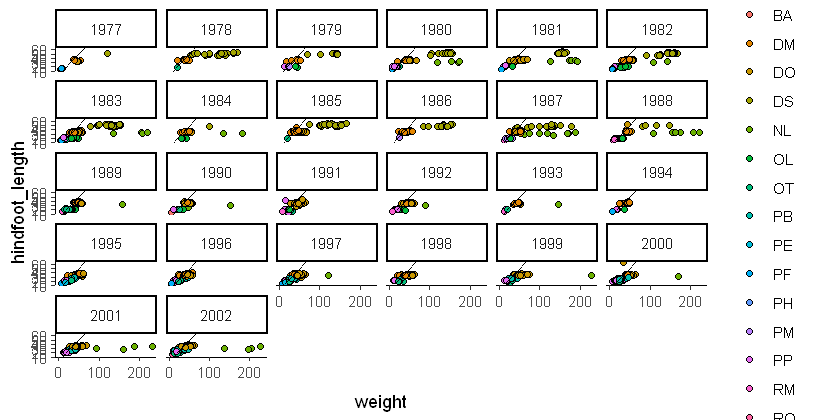

In [72]:
full_plots %>% 
na.omit() %>% 
ggplot()+
geom_point(aes(x=weight, y=hindfoot_length, fill= species_id), shape=21)+
geom_abline(aes(intercept=0,slope=1))+
facet_wrap(~year)+
theme_classic()+
scale_x_continuous(breaks=c(0,100,200))


Now let's plot hindfoot_lentgh vs weight over time by year and sex for data between the years 1977 - 1980.

<span class="editor"></span> <br>

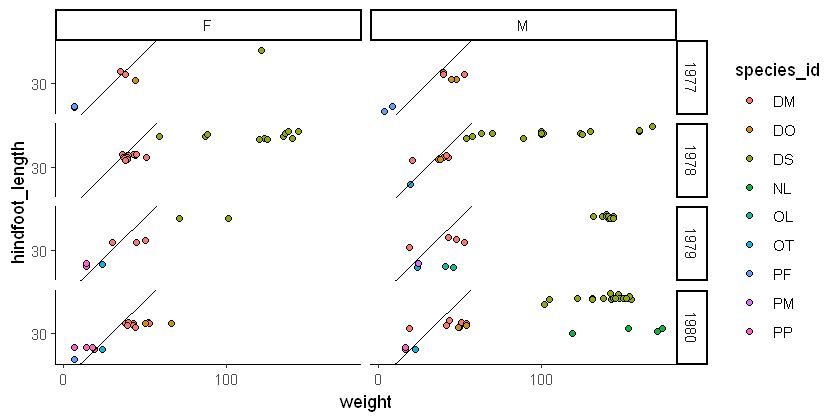

In [73]:
full_plots %>% 
filter(year >=1977 & year <=1980) %>% 
na.omit() %>% 
ggplot()+
geom_point(aes(x=weight, y=hindfoot_length, fill= species_id), shape=21)+
geom_abline(aes(intercept=0,slope=1))+
facet_grid(year~sex)+
theme_classic()+
scale_x_continuous(breaks=c(0,100,200))+
scale_y_continuous(breaks=c(0,30,60))


We can also use other dplyr functions like `mutate()` on database objects. Let's use the table object `joined_plots` and create a column of hindfoot_length/weight. First we'll remove rows where weight is NA using `filter(!is.na(weight))`. Next we'll add a new column called "ratio" and convert the table into a dataframe usng `as.data.frame()`. Finally, we'll used `head()` to display the first 6 rows of the data frame.

In [74]:
joined_plots %>%
dplyr::filter(!is.na(weight)) %>% 
dplyr::mutate(ratio=hindfoot_length/weight) %>% 
as.data.frame() %>% 
head()

plot_id,plot_type,record_id,month,day,year,species_id,sex,hindfoot_length,weight,ratio
1,Spectab exclosure,78,8,19,1977,PF,M,16,9,1
1,Spectab exclosure,218,9,13,1977,PF,M,13,4,3
1,Spectab exclosure,263,10,16,1977,DM,M,37,40,0
1,Spectab exclosure,270,10,16,1977,DM,F,36,38,0
1,Spectab exclosure,285,10,16,1977,DM,M,36,53,0
1,Spectab exclosure,352,11,12,1977,DM,M,36,40,0


<img src="complexquerie.png" width="700px">

All these manipulations occur without physical download of the data, by translating your code into SQL in the background. Since data download is often the most time consuming step, this allows you to think about how much work you want to get done on the server before you pull the data. When you are ready to pull the data, you just use `collect()`. This will send the background compiled SQL query to the database and execute it. 

<div class="Q"><br>

What does he function `head()` do?
    
ANSWER: returns the first 6 rows of the dataframe.
<br><br><div class="qhelp"></div>

<div class="Q"><br>

`inner_join` returns:
    
ANSWER: all rows from x where there are matching values in y, and all columns from x and y
<br><br><div class="qhelp"></div>

<div class="Q"><br>

TRUE or FALSE: `left_join` will remove all entries without observations (no data).
    
ANSWER: FALSE
<br><br><div class="qhelp"></div>

<div class="Q"><br><br>
What would the code that returns the number of rodents observed in each plot in each year look like in dplyr syntax?

Hint: Connect to the species table and write a query that joins the species and survey tables together to exclude all non-rodents. The query should return counts of rodents by year.

Answer : species <- tbl(mammals, "species")

left_join(surveys, species) %>%
  filter(taxa == "Rodent") %>%
  group_by(taxa, year) %>%
  tally %>%
  collect()

<br><br><div class="qhelp"></div>

<div class="Q"><br><br>
What would the code that returns the total number of rodents in each genus caught in the different plot types look like in dplyr syntax?

Hint: Write a query that joins the species, plot, and survey tables together. The query should return counts of genus by plot type.

Answer : species <- tbl(mammals, "species")
genus_counts <- left_join(surveys, plots) %>%
  left_join(species) %>%
  filter(taxa == "Rodent") %>%
  group_by(plot_type, genus) %>%
  tally %>%
  collect()

<br><br><div class="qhelp"></div>

# Using databases to improve performance and decision-making

With massive data collection from the Internet of Things transforming life and industry across the globe, we have access to more data than ever before. Forward-thinking organizations can now use databases to go beyond basic data storage and transactions to analyze vast quantities of data from multiple systems. Using database and other computing and business intelligence tools, organizations can now leverage the data they collect to run more efficiently, enable better decision-making, and become more agile and scalable. By having direct control over the ability to create and use databases, users gain control and autonomy while still maintaining important security standards.

<span class="console"></span> <br>
----------------------------- <br>
<span class="editor"></span> <br>
----------------------------- <br>
<span class="c2c"></span> <br>
<div class="c2c"></div> <br>
----------------------------- <br>
<span class="run"></span> <br>
<div class="run"></div> <br>
----------------------------- <br>
<span class="runcell"></span> <br>
<div class="runcell"></div> <br>
----------------------------- <br>
<span class="file">Text</span> <br>
<div class="file">Text</div> <br>
----------------------------- <br>
<span class="important"></span> <br>
<div class="important"></div> <br>
----------------------------- <br>
<span class="note"></span> <br>
<div class="note"></div> <br>
----------------------------- <br>
<span class="checkpoint">Text</span> <br>
<div class="checkpoint">Text</div> <br>
-----------------------------
<span class="codeerror">Text</span> <br>
<div class="codeerror">Text</div> <br>
----------------------------- <br>
<span class="lineerror">Text</span> <br>
<div class="lineerror">Text</div> <br>
----------------------------- <br>
<span class="terminal"></span> <br>
<div class="terminal"></div> <br>
----------------------------- <br>
<span class="terminalBlock">Text</span> <br>
<div class="terminalBlock">Text</div> <br>
----------------------------- <br>
<span class="nomenclature">nomenclature</span> <br>
<div class="nomenclature">nomenclature</div> <br>
----------------------------- <br>
<span class="code">code</span> <br>
<div class="code">code</div> <br>
----------------------------- <br>
<span class="rendered_html">rendered_html</span> <br>
<div class="rendered_html">rendered_html</div> <br>
----------------------------- <br>

<br><br><br>
<div class="startTASK"></div>

Write task here

<div class="endTASK"></div>
<br><br><br>



<img src="../media/R_logo.png" width="150px">
<a href="bad_layout.png" target="_blank"><img src="bad_layout.png" width="700px"></a>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [54]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>body {counter-reset: question_num;}.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) '\\A'; white-space: pre; }</style>")